In [54]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Business Understanding

You have a dataset (internship_train.csv) that contains 53 anonymized features and a target column. Your task is to build model that predicts a target based on the proposed features. Please provide predictions for internship_hidden_test.csv file. Target metric is **RMSE**.

# Data Understanding

In [2]:
df = pd.read_csv('internship_train.csv')

Checking the general structure of the data and if there are missing values or duplicates.

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,...,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677,20.107472
1,386,206,357,232,1,198,7.810250,0.763713,1,143,...,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871,61.763713
2,429,49,481,111,111,146,8.602325,0.651162,1,430,...,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951,74.651162
3,414,350,481,370,208,158,8.306624,0.424645,1,340,...,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098,69.424645
4,318,359,20,218,317,301,8.124038,0.767304,1,212,...,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419,66.767304


In [4]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
89995,328,44,320,364,7,73,4.898979,0.563878,1,315,...,0.266362,6.185887,7.716837,10.144664,1.711649,3.849704,12.401903,14.195540,2.371207,24.563878
89996,217,472,174,327,255,389,-3.605551,0.861690,0,144,...,5.147059,4.209660,14.482770,1.375031,6.386263,10.107582,12.637902,6.576331,6.863238,13.861690
89997,189,406,213,57,494,190,6.164414,0.633704,1,221,...,14.902807,2.886534,8.683168,4.522339,1.556421,10.971184,7.792226,8.422623,3.041409,38.633704
89998,418,478,163,35,390,77,-3.605551,0.687309,0,289,...,12.743029,2.525611,11.050145,6.589943,12.622192,10.596839,0.647584,8.746364,1.246682,13.687309
89999,244,335,337,152,386,202,7.681146,0.613207,1,26,...,11.069077,6.303448,14.031393,1.877340,13.361607,2.164695,11.255181,3.404303,9.587379,59.613207


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 54 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       90000 non-null  int64  
 1   1       90000 non-null  int64  
 2   2       90000 non-null  int64  
 3   3       90000 non-null  int64  
 4   4       90000 non-null  int64  
 5   5       90000 non-null  int64  
 6   6       90000 non-null  float64
 7   7       90000 non-null  float64
 8   8       90000 non-null  int64  
 9   9       90000 non-null  int64  
 10  10      90000 non-null  int64  
 11  11      90000 non-null  int64  
 12  12      90000 non-null  int64  
 13  13      90000 non-null  float64
 14  14      90000 non-null  float64
 15  15      90000 non-null  float64
 16  16      90000 non-null  float64
 17  17      90000 non-null  float64
 18  18      90000 non-null  float64
 19  19      90000 non-null  float64
 20  20      90000 non-null  float64
 21  21      90000 non-null  float64
 22

In [7]:
sum(df.duplicated())

0

No missing values and no duplicates. There is very little need for cleaning the dataset. Features are anonymized so there is no much information value out of them, but their types are mainly float and int with different ranging.

In [8]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
count,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,...,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000
mean,249.423944,250.236267,248.637289,249.736600,249.436178,249.656167,-0.011402,0.498548,0.499189,249.842033,...,7.475155,7.523962,7.508397,7.473322,7.490658,7.474578,7.509206,7.487159,7.513316,50.033981
std,144.336393,144.022200,144.107577,144.284945,143.941581,144.329168,7.038171,0.288682,0.500002,144.612718,...,4.330410,4.321537,4.331761,4.335692,4.332122,4.323035,4.326364,4.324876,4.333080,28.897243
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.949874,0.000014,0.000000,0.000000,...,0.000019,0.000040,0.000154,0.000083,0.000367,0.000014,0.000160,0.000147,0.000125,0.002634
25%,125.000000,126.000000,124.000000,125.000000,125.000000,124.000000,-7.071068,0.248932,0.000000,124.000000,...,3.707544,3.797002,3.760627,3.715721,3.739358,3.715298,3.773381,3.743536,3.776322,25.091903
50%,250.000000,251.000000,248.000000,250.000000,250.000000,250.000000,0.000000,0.497136,0.000000,250.000000,...,7.474127,7.533987,7.505259,7.459774,7.494167,7.477270,7.512575,7.476564,7.506812,50.030705
75%,374.000000,375.000000,374.000000,375.000000,373.000000,374.000000,7.000000,0.747513,1.000000,376.000000,...,11.216585,11.276349,11.261971,11.215637,11.239232,11.210070,11.268156,11.234414,11.277835,75.059454
max,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,9.949874,0.999987,1.000000,499.000000,...,14.999900,14.999528,14.999733,14.999478,14.999869,14.999928,14.999948,14.999364,14.999775,99.999482


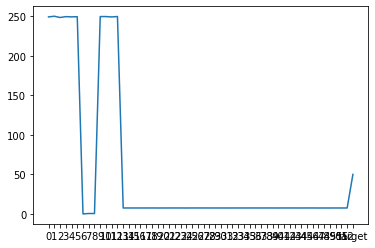

In [45]:
df_mean = df.mean()
plt.plot(df_mean.index, df_mean.values)

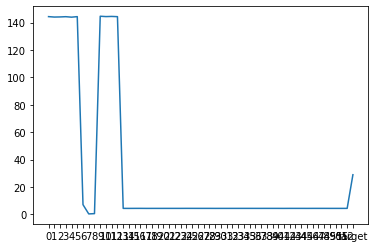

In [46]:
df_std = df.std()
plt.plot(df_std.index, df_std.values)

In [56]:
df_mean

0         249.423944
1         250.236267
2         248.637289
3         249.736600
4         249.436178
5         249.656167
6          -0.011402
7           0.498548
8           0.499189
9         249.842033
10        249.818967
11        249.346778
12        249.899900
13          7.483940
14          7.498037
15          7.496259
16          7.501635
17          7.486463
18          7.523043
19          7.475585
20          7.494835
21          7.503939
22          7.507724
23          7.508681
24          7.472421
25          7.519205
26          7.515753
27          7.509402
28          7.496781
29          7.504014
30          7.494212
31          7.490808
32          7.486936
33          7.514508
34          7.491614
35          7.520193
36          7.507801
37          7.493713
38          7.513840
39          7.507033
40          7.479579
41          7.519826
42          7.502483
43          7.512965
44          7.475155
45          7.523962
46          7.508397
47          7

There are 3 groups of variables with very similar mean and standard deviation: 
    - group 1 with mean close to 250
    - group 2 with mean close to 0
    - group 3 with mean close to 7

In [51]:
df_corr = df.corr()

<AxesSubplot:>

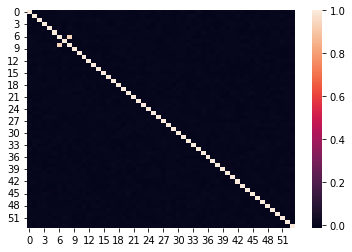

In [52]:
sns.heatmap(df_corr)

Predictor variables are not correlated.

# Data Preperation

## Feature Scalling

In [170]:
from sklearn.preprocessing import MinMaxScaler

In [171]:
scaler = MinMaxScaler()

In [172]:
normalized_df = scaler.fit_transform(df)

In [173]:
normalized_df = pd.DataFrame(normalized_df)

In [174]:
normalized_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
count,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,...,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000
mean,0.499848,0.501475,0.498271,0.500474,0.499872,0.500313,0.499427,0.498547,0.499189,0.500685,...,0.498346,0.501612,0.500564,0.498236,0.499369,0.498307,0.500610,0.499160,0.500891,0.500329
std,0.289251,0.288622,0.288793,0.289148,0.288460,0.289237,0.353681,0.288690,0.500002,0.289805,...,0.288696,0.288112,0.288792,0.289058,0.288818,0.288204,0.288428,0.288340,0.288879,0.288982
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250501,0.252505,0.248497,0.250501,0.250501,0.248497,0.144665,0.248925,0.000000,0.248497,...,0.247170,0.253139,0.250705,0.247719,0.249274,0.247687,0.251552,0.249572,0.251752,0.250901
50%,0.501002,0.503006,0.496994,0.501002,0.501002,0.501002,0.500000,0.497136,0.000000,0.501002,...,0.498278,0.502280,0.500354,0.497333,0.499603,0.498487,0.500835,0.498454,0.500457,0.500296
75%,0.749499,0.751503,0.749499,0.751503,0.747495,0.749499,0.851763,0.747519,1.000000,0.753507,...,0.747777,0.751780,0.750809,0.747734,0.749282,0.747341,0.751210,0.748990,0.751865,0.750592
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [175]:
df_x = normalized_df.drop(53, axis=1)
df_x

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,0.472946,0.977956,0.032064,0.442886,0.765531,0.194389,0.275267,0.107460,0.0,0.264529,...,0.675018,0.889397,0.058035,0.130856,0.497792,0.769854,0.588197,0.603093,0.526387,0.734054
1,0.773547,0.412826,0.715431,0.464930,0.002004,0.396794,0.892480,0.763720,1.0,0.286573,...,0.705671,0.832331,0.477926,0.192356,0.827626,0.684031,0.672760,0.618057,0.211601,0.928138
2,0.859719,0.098196,0.963928,0.222445,0.222445,0.292585,0.932283,0.651165,1.0,0.861723,...,0.684891,0.935357,0.026330,0.544047,0.839499,0.595834,0.151013,0.750381,0.853024,0.805407
3,0.829659,0.701403,0.963928,0.741483,0.416834,0.316633,0.917424,0.424643,1.0,0.681363,...,0.459022,0.185972,0.427792,0.703330,0.763788,0.431196,0.167937,0.017208,0.621202,0.358873
4,0.637275,0.719439,0.040080,0.436874,0.635271,0.603206,0.908248,0.767310,1.0,0.424850,...,0.744198,0.125770,0.128002,0.151208,0.009956,0.273712,0.694422,0.454410,0.572484,0.300827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,0.657315,0.088176,0.641283,0.729459,0.014028,0.146293,0.746183,0.563879,1.0,0.631263,...,0.350152,0.017756,0.412404,0.514460,0.676333,0.114089,0.256648,0.826795,0.946409,0.158076
89996,0.434870,0.945892,0.348697,0.655311,0.511022,0.779559,0.318814,0.861699,0.0,0.288577,...,0.982488,0.343139,0.280651,0.965535,0.091667,0.425740,0.673842,0.842528,0.438435,0.457552
89997,0.378758,0.813627,0.426854,0.114228,0.989980,0.380762,0.809773,0.633707,1.0,0.442886,...,0.486438,0.993527,0.192440,0.578884,0.301496,0.103740,0.731416,0.519478,0.561528,0.202757
89998,0.837675,0.957916,0.326653,0.070140,0.781563,0.154309,0.318814,0.687313,0.0,0.579158,...,0.929612,0.849541,0.168377,0.736687,0.439342,0.841483,0.706459,0.043162,0.583112,0.083106


In [176]:
df_y = df['target']
df_y

0        20.107472
1        61.763713
2        74.651162
3        69.424645
4        66.767304
           ...    
89995    24.563878
89996    13.861690
89997    38.633704
89998    13.687309
89999    59.613207
Name: target, Length: 90000, dtype: float64

# Modelling

In [177]:
from sklearn.model_selection import train_test_split

In [178]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.3, random_state=1234)

In [179]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(63000, 53) (27000, 53) (63000,) (27000,)


## Pipelining models

In [201]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [181]:
pipelines = {
    'ridge':      make_pipeline(Ridge(random_state = 1234)),
    'lasso':      make_pipeline(Lasso(random_state = 1234)),
    'elasticnet': make_pipeline(ElasticNet(random_state = 1234)),
    'rf':         make_pipeline(RandomForestRegressor(random_state = 1234)),
    'gb':         make_pipeline(GradientBoostingRegressor(random_state = 1234))
}

In [182]:
hypergrid = {
    'ridge':{
        'ridge__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'lasso':{
        'lasso__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'elasticnet':{
        'elasticnet__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'rf':{
        'randomforestregressor__min_samples_split':[2,4,6],
        'randomforestregressor__min_samples_leaf':[1,2,3]
    },  
    'gb':{
        'gradientboostingregressor__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    }
}

In [183]:
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError

In [184]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hypergrid[algo], cv=10, n_jobs=-1)
    try:
        print(f'Training model: {algo} ')
        model.fit(x_train, y_train)
        fit_models[algo] = model
        print(f'{algo} model training finished')
    except NotFittedError as e:
        print(repr(e))

Training model: ridge 
ridge model training finished
Training model: lasso 
lasso model training finished
Training model: elasticnet 
elasticnet model training finished
Training model: rf 
rf model training finished
Training model: gb 
gb model training finished


# Evaluation 

Target metric is RMSE so I will evaluate using it.

In [185]:
from sklearn.metrics import mean_squared_error

In [186]:
for algo,model in fit_models.items():
    y_pred = model.predict(x_test)
    print(f'RMSE: {mean_squared_error(y_test, y_pred, squared=False)}, MODEL: {algo}')

RMSE: 28.9948452446464, MODEL: ridge
RMSE: 28.985286311380897, MODEL: lasso
RMSE: 28.985250492568653, MODEL: elasticnet
RMSE: 0.004284490384672895, MODEL: rf
RMSE: 0.42543583677628366, MODEL: gb


In [187]:
best_model = fit_models['rf']

# Prediction

In [188]:
df_pred = pd.read_csv('internship_hidden_test.csv')

In [189]:
df_pred

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,259,388,402,340,156,382,3.316625,0.218760,1,164,...,7.163474,10.227235,0.889111,9.190222,4.670908,0.931525,7.634177,0.158196,13.432551,2.511191
1,441,192,381,421,452,123,-8.888194,0.700228,0,349,...,10.619064,9.339161,4.221861,0.595563,13.865748,0.328453,11.507599,9.107966,1.302407,11.105604
2,83,129,107,156,247,191,2.645751,0.494556,1,297,...,1.819890,10.670237,10.350867,5.134417,5.898995,8.374986,4.638049,3.160023,2.243799,5.073030
3,183,438,191,116,491,403,-6.164414,0.511117,0,272,...,4.168135,12.782579,0.513072,0.321295,11.334062,11.735511,1.911520,8.365676,4.877288,11.601819
4,449,156,310,188,279,465,8.000000,0.756416,1,90,...,7.908122,1.140498,14.165074,7.688796,5.079241,8.152186,1.680403,13.215111,5.823109,1.038015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,221,246,314,406,464,317,6.708204,0.436684,1,205,...,1.272356,12.306512,7.778209,5.698493,10.023215,4.959409,4.056025,4.642375,4.533745,6.754558
9996,152,157,32,133,369,261,5.656854,0.986208,1,457,...,2.331195,13.176561,6.697370,4.119232,2.190155,14.555999,7.786794,9.414130,5.413161,4.134093
9997,349,240,355,97,93,176,4.690416,0.830543,1,287,...,14.423037,0.941523,3.555292,12.572057,7.058367,12.999451,1.901825,5.100031,1.498432,8.093801
9998,427,70,63,265,62,150,4.000000,0.502337,1,124,...,1.154640,1.593796,9.902159,2.548667,11.339210,14.192310,14.142207,9.966924,8.538981,7.036367


In [190]:
df_pred = scaler.fit_transform(df_pred)
df_pred

array([[0.51903808, 0.77755511, 0.80561122, ..., 0.01043319, 0.89558879,
        0.1674354 ],
       [0.88376754, 0.38476954, 0.76352705, ..., 0.6071531 , 0.08678525,
        0.74050372],
       [0.16633267, 0.25851703, 0.21442886, ..., 0.21057804, 0.14955457,
        0.33825666],
       ...,
       [0.6993988 , 0.48096192, 0.71142285, ..., 0.33992674, 0.09985559,
        0.53967922],
       [0.85571142, 0.14028056, 0.12625251, ..., 0.66442356, 0.56929945,
        0.46917034],
       [0.28857715, 0.43286573, 0.13226453, ..., 0.04853297, 0.05108908,
        0.63623025]])

In [191]:
y_hat = best_model.predict(df_pred)

In [192]:
y_hat

array([11.21598225, 79.70032417,  7.49347039, ..., 22.82700456,
       16.50145416, 91.98097485])

In [195]:
prediction = pd.DataFrame(y_hat, columns=['predictions']).to_csv('predictions.csv')